In [ ]:
import h5py
import numpy as np
import tensorflow as tf

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataM.h5 to dataM.h5


In [ ]:
# Open the H5 file
file = h5py.File('dataM.h5', 'r')

# Create empty lists to store the preprocessed data
Matrix_13_data = []
Matrix_16_data = []

In [ ]:
for i in range(1, 1001):
    # Construct the dataset paths
    Matrix_13_path = f"dataset_group/Matrix_13_{i}"
    Matrix_16_path = f"dataset_group/Matrix_16_{i}"
    # Load vector_13 and vector_16 from the H5 file
    Matrix_13 = np.array(file[Matrix_13_path])
    Matrix_16 = np.array(file[Matrix_16_path])

    # Add the data to the respective lists
    Matrix_13_data.append(Matrix_13)
    Matrix_16_data.append(Matrix_16)

# Close the H5 file
file.close()

In [ ]:
# Convert the lists to numpy arrays
Matrix_13_data = np.array(Matrix_13_data)
Matrix_16_data = np.array(Matrix_16_data)

# Normalize the data (optional, good idea?)
# vector_13_data = vector_13_data / np.max(vector_13_data)
# vector_16_data = vector_16_data / np.max(vector_16_data)

# Reshape Matrix_13_data to (1000, 16, 16) and Matrix_16_data to (1000, 16, 16)
Matrix_13_data = np.reshape(Matrix_13_data, (1000, 16, 16))
Matrix_16_data = np.reshape(Matrix_16_data, (1000, 16, 16))

In [ ]:
# Split the dataset into training and testing sets
train_ratio = 0.8
train_size = int(train_ratio * Matrix_13_data.shape[0])

x_train = Matrix_13_data[:train_size]
y_train = Matrix_16_data[:train_size]

x_test = Matrix_13_data[train_size:]
y_test = Matrix_16_data[train_size:]

In [ ]:
# W being the 'hypermatrix'
W = tf.Variable(tf.random.normal((16, 16, 16, 16)))

# Apply einsum to map x_train to y_train
y_pred = tf.einsum('aij,klij->akl', x_train, W)


In [ ]:
# Define the loss function
# loss = tf.reduce_mean(tf.square(y_train - y_pred))

# Create an optimizer and training operation
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
# Sanity check
tf.config.list_physical_devices('GPU')

[]

In [ ]:
# Training loop
num_epochs = 1000
batch_size = 32
num_batches = int(np.ceil(x_train.shape[0] / batch_size))

for epoch in range(num_epochs):
    for i in range(num_batches):
        # Select the mini-batch
        x_batch = x_train[i * batch_size: (i + 1) * batch_size]
        y_batch = y_train[i * batch_size: (i + 1) * batch_size]

        # Perform forward pass and compute loss
        with tf.GradientTape() as tape:
            y_pred = tf.einsum('aij,klij->akl', x_batch, W)
            loss_value = tf.keras.losses.MeanSquaredError()(y_batch, y_pred)

        # Compute gradients and update weights
        gradients = tape.gradient(loss_value, [W])
        optimizer.apply_gradients(zip(gradients, [W]))

    # Print progress
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss_value:.4f}")

Epoch 10/1000, Loss: 11.7109
Epoch 20/1000, Loss: 6.8581
Epoch 30/1000, Loss: 4.5324
Epoch 40/1000, Loss: 3.3607
Epoch 50/1000, Loss: 2.7455
Epoch 60/1000, Loss: 2.4130
Epoch 70/1000, Loss: 2.2285
Epoch 80/1000, Loss: 2.1214
Epoch 90/1000, Loss: 2.0526
Epoch 100/1000, Loss: 2.0014
Epoch 110/1000, Loss: 1.9565
Epoch 120/1000, Loss: 1.9123
Epoch 130/1000, Loss: 1.8693
Epoch 140/1000, Loss: 1.8249
Epoch 150/1000, Loss: 1.7808
Epoch 160/1000, Loss: 1.7361
Epoch 170/1000, Loss: 1.6916
Epoch 180/1000, Loss: 1.6481
Epoch 190/1000, Loss: 1.6057
Epoch 200/1000, Loss: 1.5626
Epoch 210/1000, Loss: 1.5240
Epoch 220/1000, Loss: 1.4831
Epoch 230/1000, Loss: 1.4439
Epoch 240/1000, Loss: 1.4085
Epoch 250/1000, Loss: 1.3726
Epoch 260/1000, Loss: 1.3359
Epoch 270/1000, Loss: 1.3052
Epoch 280/1000, Loss: 1.2700
Epoch 290/1000, Loss: 1.2432
Epoch 300/1000, Loss: 1.2132
Epoch 310/1000, Loss: 1.1835
Epoch 320/1000, Loss: 1.1572
Epoch 330/1000, Loss: 1.1311
Epoch 340/1000, Loss: 1.1054
Epoch 350/1000, Loss: 

In [ ]:
# Evaluation
y_pred_test = tf.einsum('aij,klij->akl', x_test, W)

# Select a random index from the test set
random_index = np.random.randint(low=0, high=y_test.shape[0])

# Select the predicted and ground truth matrices at the random index
predicted_matrix = y_pred_test[random_index]
ground_truth_matrix = y_test[random_index]

# Print the selected matrices for comparison
print("Predicted Matrix:")
# print(predicted_matrix)
print("Ground Truth Matrix:")
# print(ground_truth_matrix)

Predicted Matrix:
Ground Truth Matrix:


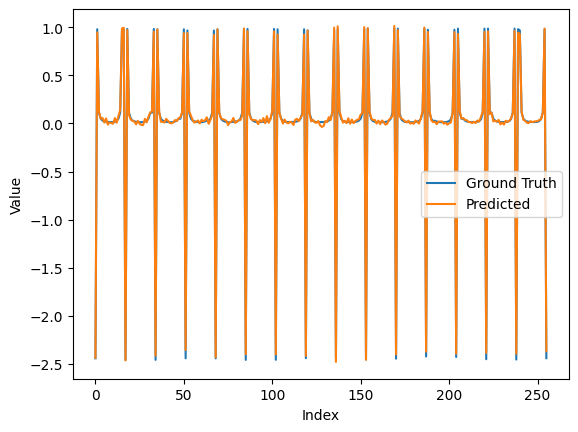

In [ ]:
import matplotlib.pyplot as plt

# Flatten the ground truth and predicted matrices
ground_truth_vector = np.array(ground_truth_matrix, order='F').flatten()
predicted_vector = np.array(predicted_matrix, order='F').flatten()

# print(ground_truth_vector)

# Create x-axis values for the plot
x = range(len(ground_truth_vector))

# Plot the ground truth and predicted vectors
plt.plot(x, ground_truth_vector, label='Ground Truth')
plt.plot(x, predicted_vector, label='Predicted')

plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

plt.show()